In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

## Artist Tag Network

Different artists with their unique id

In [5]:
artists = pd.read_csv('../data/hetrec2011-lastfm-2k/artists.dat', sep= '\t')
artists.head(5)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


Different tags with their unique ids

In [6]:
tags = pd.read_csv('../data/hetrec2011-lastfm-2k/tags.dat', sep = '\t', encoding = 'latin-1')
tags.head(5)

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


Listening preference of different users with associated tags. Single artist can have multiple tags

In [8]:
user_artists_tags = pd.read_csv('../data/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat', sep= '\t')
user_artists_tags.head(5)

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


In [9]:
temp1 = pd.merge(user_artists_tags[['artistID', 'tagID']].drop_duplicates(), 
                 tags, 
                 on = 'tagID', 
                 how = 'inner') # get tag name
print(temp1.shape)
temp2 = pd.merge(temp1, artists[['id','name']], 
                 left_on = 'artistID', 
                 right_on='id', 
                 how = 'inner').drop(['id'], axis = 1) # get artist name
print(temp2.shape)
temp3 = pd.merge(temp2, top_artists['artistID'], on = 'artistID', how = 'inner') # get top artists
temp3.head(5)

(109750, 3)
(108437, 4)


NameError: name 'top_artists' is not defined

<img src="../data/images/tags.png"  width="500"/>|<img src="./data/images/artists.png"  width="500"/>


Get weights from #tags common

In [183]:
temp5a.head(10)

,name_x,tagValue_x,name_y,cnt
1,Radiohead,chillout,Björk,46
2,Radiohead,chillout,Massive Attack,30
3,Radiohead,chillout,Depeche Mode,69
4,Radiohead,chillout,Alicia Keys,18
5,Radiohead,chillout,Coldplay,70
6,Radiohead,chillout,Portishead,34
7,Radiohead,chillout,Gorillaz,22
8,Radiohead,chillout,Muse,67
9,Radiohead,chillout,Red Hot Chili Peppers,34
10,Radiohead,chillout,Nelly Furtado,28


In [186]:
temp4a[(temp4a['name_x'] == 'Radiohead')& (temp4a['name_y'] == 'Alicia Keys')]

,artistID_x,tagID,tagValue_x,name_x,artistID_y,tagValue_y,name_y
4,154,13,chillout,Radiohead,301,chillout,Alicia Keys
7927,154,24,pop,Radiohead,301,pop,Alicia Keys
19597,154,73,rock,Radiohead,301,rock,Alicia Keys
48406,154,83,jazz,Radiohead,301,jazz,Alicia Keys
74824,154,213,beautiful,Radiohead,301,beautiful,Alicia Keys
84286,154,234,amazing,Radiohead,301,amazing,Alicia Keys
91683,154,210,00s,Radiohead,301,00s,Alicia Keys
110164,154,287,lovely,Radiohead,301,lovely,Alicia Keys
114025,154,352,90s,Radiohead,301,90s,Alicia Keys
117623,154,364,favorites,Radiohead,301,favorites,Alicia Keys


In [176]:
temp3.head(5)
temp4a = pd.merge(temp3,temp3, on = 'tagID' )
temp5a = temp4a[temp4a['artistID_x'] != temp4a['artistID_y']][['name_x','tagValue_x','name_y']].drop_duplicates()
temp5a['cnt'] = temp5a.groupby(['name_x','name_y'])['tagValue_x'].transform('count')
# temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates().sort_values(['cnt'], ascending = False)
# plt.hist(temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates()['cnt'])
temp6a = temp5a[['name_x', 'name_y', 'cnt']].drop_duplicates()
temp6a_filtered = temp6a[temp6a['cnt']>20].reset_index(drop=True)

U = nx.Graph()
edge_list = list(zip(temp6a_filtered['name_x'], temp6a_filtered['name_y'], temp6a_filtered['cnt']))
U.add_weighted_edges_from(edge_list)
print(nx.info(U))

nx.write_gexf(U, "artist_artist_1.gexf")

Name: 
Type: Graph
Number of nodes: 117
Number of edges: 1960
Average degree:  33.5043


<img src="./data/images/artist_artist.png" alt="drawing" width="800"/>

In [157]:
# popular_tags = ['rock','electronic','pop','indie','alternative','chillout']
# temp4 = temp3[~temp3['tagValue'].isin(popular_tags)]
# temp5 = pd.merge(temp4,temp4, on = 'tagID' )
# temp5[temp5['artistID_x'] != temp5['artistID_y']][['name_x','tagValue_x','name_y']].drop_duplicates()
# temp6 = temp5[temp5['artistID_x'] != temp5['artistID_y']][['name_x','name_y']].drop_duplicates()

# U = nx.Graph()
# edge_list = list(zip(temp6['name_x'], temp6['name_y']))
# U.add_edges_from(edge_list)
# print(nx.info(U))

,name_x,tagValue_x,name_y
1,Radiohead,trip-hop,Björk
2,Radiohead,trip-hop,Massive Attack
3,Radiohead,trip-hop,Depeche Mode
4,Radiohead,trip-hop,Portishead
5,Radiohead,trip-hop,Gorillaz
6,Radiohead,trip-hop,Nelly Furtado
7,Radiohead,trip-hop,Nine Inch Nails
8,Björk,trip-hop,Radiohead
10,Björk,trip-hop,Massive Attack
11,Björk,trip-hop,Depeche Mode


In [125]:
# anx.write_gexf(U, "artist_artist.gexf")

## User Artist Network

In [17]:
user_artists = pd.read_csv('../data/hetrec2011-lastfm-2k/user_artists.dat', sep= '\t')
artists = pd.read_csv('../data/hetrec2011-lastfm-2k/artists.dat', sep= '\t')

print(user_artists['userID'].nunique(),user_artists['artistID'].nunique())
display(user_artists.head(5))
display(artists.head(5))

1892 17632


,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [78]:
temp = pd.merge(user_artists, artists[['id', 'name']], 
         left_on = 'artistID', 
         right_on='id', 
         how = 'inner').rename({'name': 'artist_name'}, axis = 1)



In [109]:
temp['cnt'] = temp.groupby(['artist_name'])['id'].transform('count')
temp_filtered = temp[temp['cnt']>100].reset_index(drop=True)

In [179]:
temp_filtered.to_csv('./user_artist_cleaned.csv', index = False)

In [115]:
top_artists = temp_filtered[['artistID','artist_name']].drop_duplicates().reset_index(drop = True)

In [90]:
B = nx.Graph()
B.add_nodes_from(list(temp_filtered['userID'].unique()), bipartite=0)
B.add_nodes_from(list(temp_filtered['artist_name'].unique()), bipartite=1)
# B.add_edges_from(list(zip(temp_filtered['userID'], temp_filtered['artist_name'])))
B.add_weighted_edges_from(list(zip(temp_filtered['userID'], temp_filtered['artist_name'], temp_filtered['weight'])))
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 1938
Number of edges: 24809
Average degree:  25.6027


In [91]:
nx.write_gexf(B, "user_artist.gexf")

### User Artist Visualization

<img src="./data/images/user_artist.png" alt="drawing" width="500"/>

## User Friendship Network

In [5]:
user_friends = pd.read_csv('./data/hetrec2011-lastfm-2k/user_friends.dat', sep= '\t')

In [6]:
G = nx.Graph()
edge_list = list(zip(user_friends['userID'], user_friends['friendID']))
G.add_edges_from(edge_list)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1892
Number of edges: 12717
Average degree:  13.4429


In [47]:
!conda install faker -y

Solving environment: done

## Package Plan ##

  environment location: /Library/anaconda3

  added / updated specs:
    - faker


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py37_0         155 KB
    conda-4.8.3                |           py37_0         2.8 MB
    faker-3.0.0                |           py37_0         1.4 MB
    openssl-1.1.1f             |       h1de35cc_0         2.2 MB
    text-unidecode-1.2         |           py37_0          63 KB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  faker              pkgs/main/osx-64::faker-3.0.0-py37_0
  text-unidecode     pkgs/main/osx-64::text-unidecode-1.2-py37_0

The following packages will be UPDATED:

  certifi                                 2019.11.28-py37_

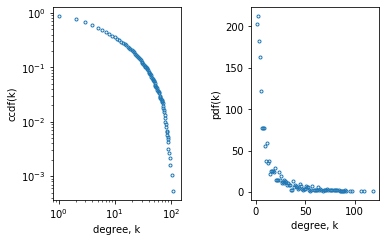

In [25]:
degrees = [G.degree(node) for node in G.nodes()]
from collections import Counter

nk = Counter(degrees)
x = []
y = []
for k in sorted(nk):
    x.append(k)
    y.append(nk[k])
    
cdf = np.cumsum(y)
ccdf = (sum(y)-cdf)/max(cdf)
fig = plt.figure()

plt.subplot(1,2,1)
plt.xlabel('degree, k')
plt.ylabel("ccdf(k)")
plt.loglog(x,ccdf, 'o', markersize=3, markerfacecolor='none')

plt.subplot(1,2,2)
plt.xlabel('degree, k')
plt.ylabel("pdf(k)")
plt.plot(x,y, 'o', markersize=3, markerfacecolor='none')

fig.tight_layout(pad=3.0)
plt.show()



In [50]:
from faker import Faker
fake = Faker()
for node in G.nodes():
    G.nodes[node]['name'] = fake.name()

In [52]:
nx.write_gexf(G, "friends.gexf")

### Friendship Network Visualization

![alt text](./data/images/friendship.png "Title")

## User Preference Network (to be done)

In [16]:
x = pd.merge(user_artists[['userID','artistID']],user_artists[['userID','artistID']], on = 'artistID' )

In [17]:
x.shape

(7985434, 3)

In [21]:
x[x['userID_x'] != x['userID_y']].shape

(7892600, 3)

In [25]:
x[x['userID_x'] != x['userID_y']][['userID_x','userID_y']].drop_duplicates().shape

(2028276, 2)